# Exercise: Chess AI

ACTL3143 & ACTL5111 Deep Learning for Actuaries

Your task is to make a Chess-playing AI which uses the minimax
algorithm.

<figure>
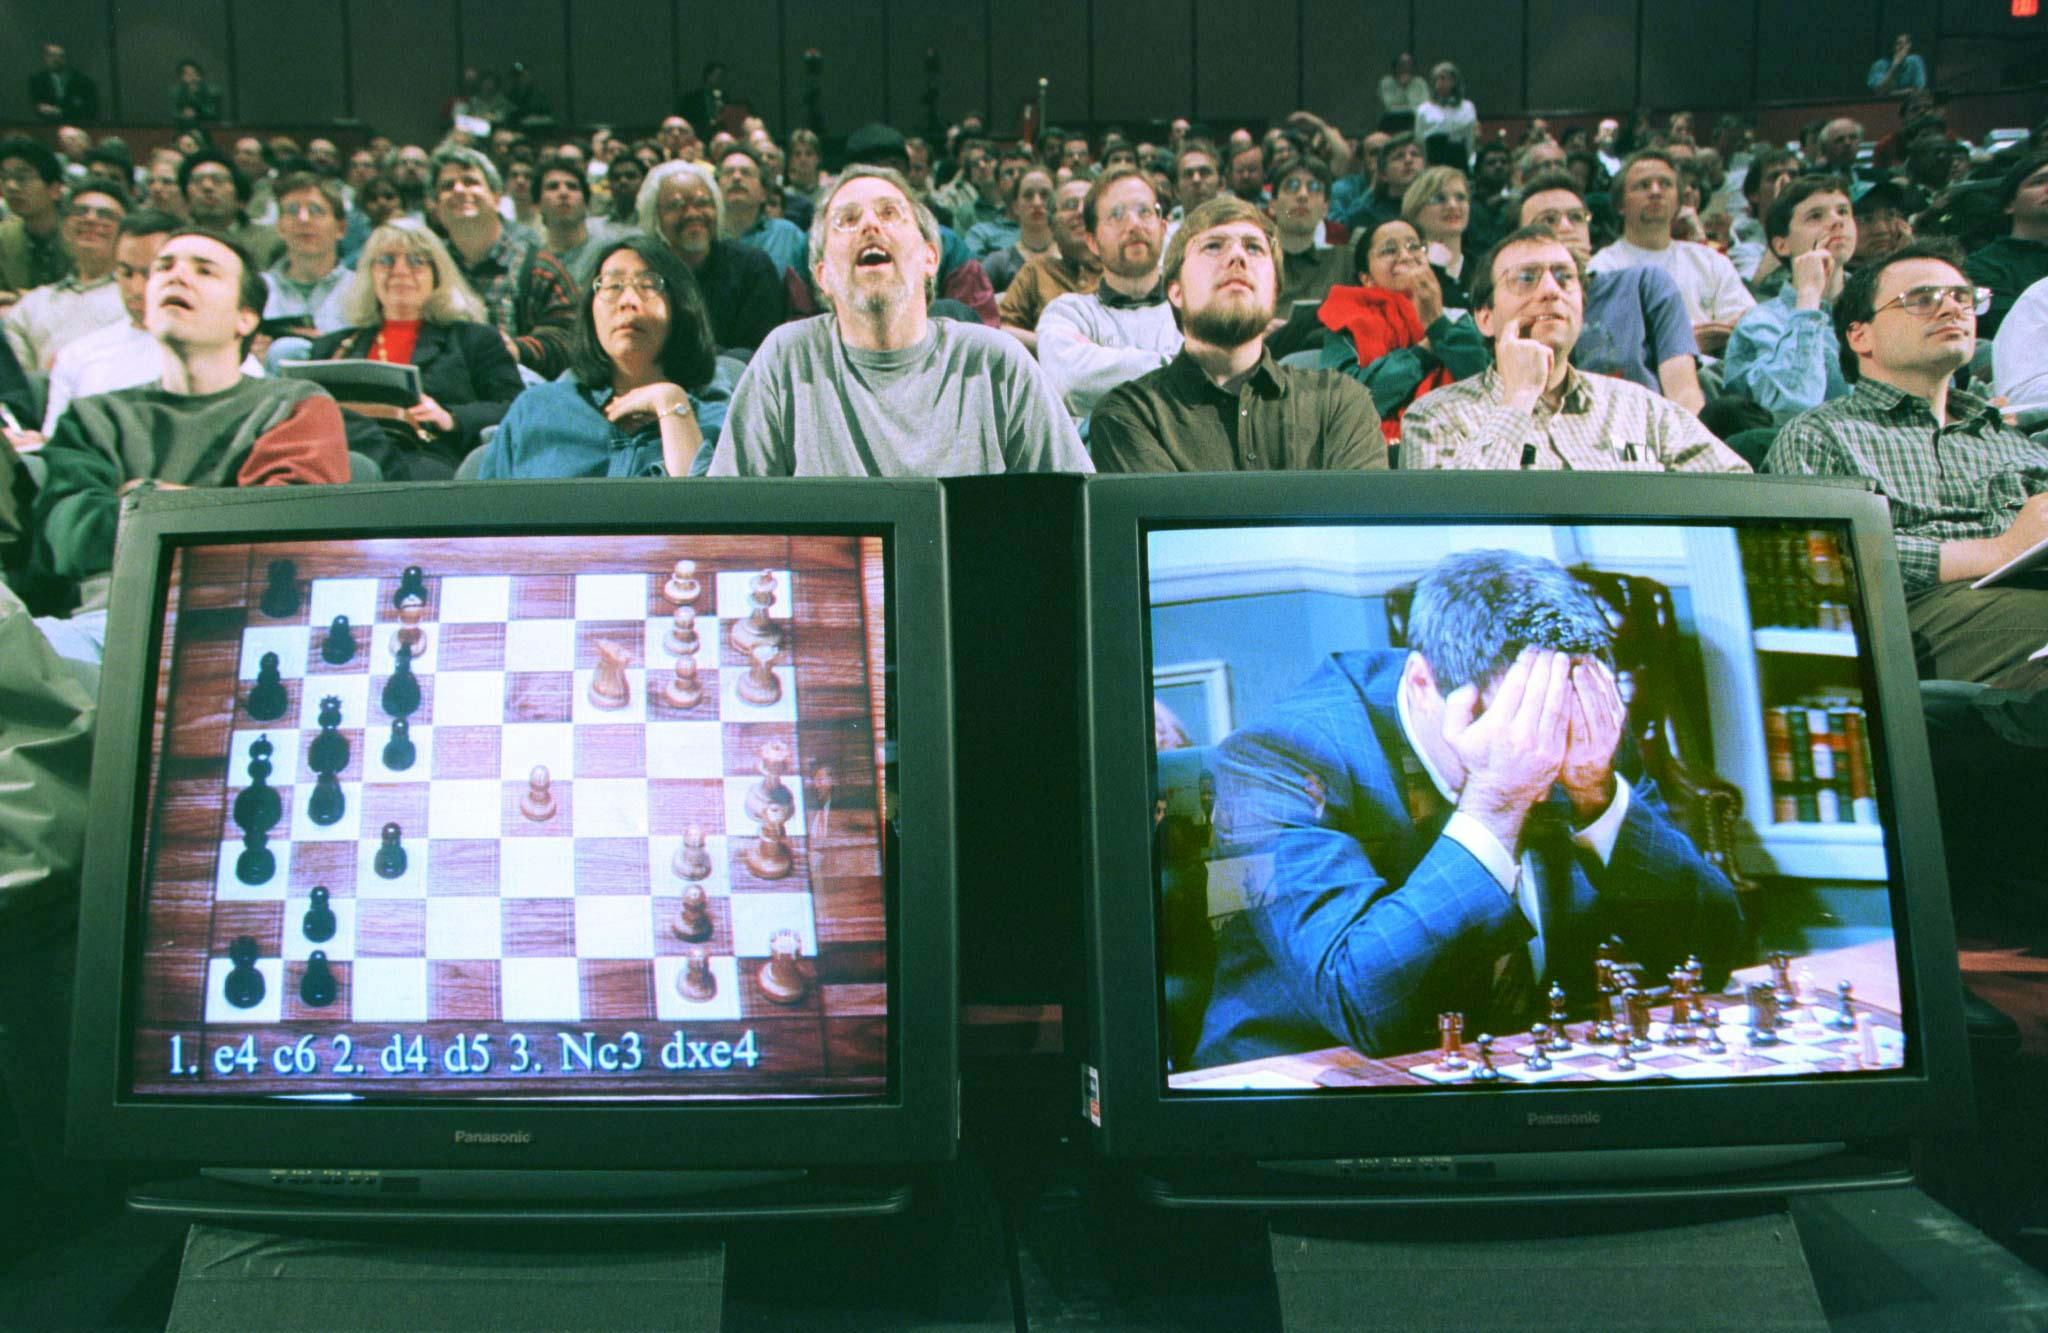
<figcaption aria-hidden="true">Gary Kasparov playing Deep Blue (<a
href="https://theconversation.com/twenty-years-on-from-deep-blue-vs-kasparov-how-a-chess-match-started-the-big-data-revolution-76882">source</a>)</figcaption>
</figure>

# Setup

In [1]:
!pip install chess

In [2]:
import chess
import math
import random
from IPython import display

# Evaluating a board

In [3]:
STANDARD_PIECE_VALUES = {"P": 1, "N": 3, "B": 3,
                         "R": 5, "Q": 9, "K": 0}

def static_evaluation(board):
    if board.is_game_over():
        outcome = board.outcome()
        if outcome.winner == chess.WHITE:
            return 1_000_000
        elif outcome.winner == chess.BLACK:
            return -1_000_000
        else:
            return 0

    pointsBalance = 0
    for square in chess.SQUARES:
        piece = board.piece_at(square)
        if piece:
          pieceValue = STANDARD_PIECE_VALUES[piece.symbol().upper()]
          if piece.symbol().isupper():
              pointsBalance += pieceValue
          else:
              pointsBalance -= pieceValue

    return pointsBalance

In [4]:
# Testing 'static_evaluation' on a board.
board = chess.Board("2r3k1/p3bp1p/2Bp1np1/4p3/1r6/B1R5/P1PP1P1P/R5K1 b - - 0 1")
board

In [5]:
# Expect this to be -1 (i.e. black up one pawn)
static_evaluation(board)

-1

# Minimax algorithm

Pseudocode to evaluate the ‘minimax’ algorithm’s value of a chess board
position.

    function minimax (position, depth, maximizingPlayer)
      if depth == 0 or game over in position
        return static evaluation of position

      if maximizingPlayer
        maxEval = -infinity
        for each child of position
          eval = minimax(child, depth - 1, false)
          maxEval = max(maxEval, eval)
        return maxEval
      else
        minEval = infinity
        for each child of position
          eval = minimax(child, depth - 1, true)
          minEval = min(minEval, eval)
        return minEval

Source of the pseudocode: Around 3-4 minute mark of the following video:

<https://youtu.be/l-hh51ncgDI>

In [6]:
# TODO: Create a 'minimax' function here, according to the pseudocode above.
def minimax(board, depth):
    pass

In [7]:
# TODO: Redefine the 'minimax' function to include the alpha-beta pruning extension.

# Watch a game of AI versus AI

The following code will play a weaker AI (minimax with depth 2) against
a stronger AI (minimax with depth 3).

In [8]:
def choose_move(board, depth=2):
  
    options = list(board.legal_moves)
    scores = []

    for move in options:
        board.push(move)
        scores.append(minimax(board, depth-1))
        board.pop()
        
    maximisingPlayer = board.turn == chess.WHITE
  
    if maximisingPlayer:
        bestScore = max(scores)
    else:
        bestScore = min(scores)
    
    bestOptions = []
    for move, score in zip(options, scores):
        if score == bestScore:
            bestOptions.append(move)

    return random.choice(bestOptions)

In [9]:
def play_ai_vs_ai():
    random.seed(42)

    board = chess.Board()
    display.display(board)

    moveNumber = 1
    while not board.is_game_over():
        
        moves = list(board.legal_moves)
        if len(moves) == 0:
            print("No moves are possible!")
            break
        
        if board.turn == chess.WHITE:
            move = choose_move(board, depth=2)
        else:
            move = choose_move(board, depth=3)
            
        board.push(move)
        
        display.clear_output(wait=True)
        display.display(board)
                  
        print(f"Move #{moveNumber}: Score = {static_evaluation(board)}")
        moveNumber += 1

Uncomment and run the following after you’ve finished making your
minimax function.

In [10]:
# play_ai_vs_ai()